<a href="https://colab.research.google.com/github/warlord02017/App/blob/main/Week5_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS-522 Homework 4


**Instructor:** Lyle Ungar

**Content Creators:** Jordan Lei

**Content Reviewers:** Kavish Shah, Ann-Katrin Reuel


In [ ]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'sashankv' #@param {type:"string"}
my_pod = 'the-weekenders' #@param ['Select', 'upain', 'ah-damn-optimizer', 'backpropagandists', 'backpropers','excel-erators','GAN-gsters','han-not-solo','hufflefluffs','lets-taco-bout-it','natural-networkers','pytorture','sigmoids','strong-signals','the-denominators','the-travellers', 'the-weekenders', 'tomorrows-incredibles', 'brute-force']
my_email = 'sashankv@seas.upenn.edu' #@param {type:"string"}


# start timing
import time
try:t0;
except NameError: t0 = time.time()


In [ ]:
#@markdown Run this cell for imports. It should print "cuda"
#@markdown 
from __future__ import print_function
import torch
import pathlib
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

torch.manual_seed(2021)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Part 1. Attack!
In this homework, you will implement a simple adversarial attack on a neural network trained on MNIST handwritten digits. It might sound complicated, but we'll guide you through it. First, let's download and familiarize ourselves with the dataset. 

**Run the cell below. Do not modify.**


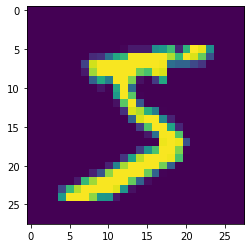

Above, I have an image with the corresponding label: 5


In [ ]:
dataset = datasets.MNIST("/content/", download = True, train = True, transform = transforms.ToTensor())

len_train = int(0.8 * len(dataset))
len_val = len(dataset) - len_train
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [len_train, len_val])

#train_loader is the data loader containing the training samples
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
#val_loader is the data loader containing the validation samples
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = True)

#visualize one of the elements
base_image = dataset[0][0].reshape(1, 784)
plt.imshow(base_image.reshape(28, 28).numpy())
plt.show()
print("Above, I have an image with the corresponding label:", dataset[0][1])

## 1.1 Network
MNIST digits come in images of size 28 x 28, and have an output of size 10. Let's construct a simple feedforward network with a *single hidden layer of size 64*. That is, our network should be shape *input --> 64 --> output*, with ReLU activations after each layer.

**Your turn. Fill in the missing parts of the network definition. Don't forget to define a forward() function.**

In [ ]:
class Net1(nn.Module): 
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return x

## 1.2 Define Functions
Now we want to define `train` and `test` functions to train and test our network, respectively. Fill in the "TODO" sections below for the train and test functions. 

**Your turn. Fill in the missing parts of the `train` and `test` functions. Don't forget to zero out the gradients, reshape the MNIST images and send them to the GPU for processing.**


In [ ]:
def train(train_loader, net, optimizer, criterion, epochs = 10):
  for epoch in range(epochs): 
    c = 0
    total_loss = 0
    total_correct = 0
    for i, (image, label) in enumerate(train_loader):
      #TODO: complete the training function (zero out gradients, reshape MNIST images)
      optimizer.zero_grad()
      image = torch.flatten(image,start_dim=1)
      image = image.to(device)
      label = label.to(device)

      #TODO: define prediction
      prediction = net(image)

      #calculate the loss
      loss = criterion(prediction,label) 
      
      #TODO: complete the training function
      loss.backward()
      optimizer.step()

      #TODO: define the predicted class
      predicted_class = prediction.argmax(dim=1)

      correct = torch.sum((predicted_class == label))
      total_loss += loss
      total_correct += correct
      c += len(label)

      if i%500 == 0:
        print("[Epoch %s]\tAcc:%.4f\tLoss:%.4f"%(epoch, (total_correct/c).item(), (total_loss/c).item()))


def test(test_loader, net, criterion): 
  c = 0
  total_loss = 0
  total_correct = 0
  for i, (image, label) in enumerate(test_loader):
    #TODO: reshape images and send them to the GPU as above 
    image = torch.flatten(image,start_dim=1)
    image = image.to(device)
    label = label.to(device)
    #TODO: use your network to make a prediction
    prediction = net(image) 

    #TODO: calculate the loss 
    loss = criterion(prediction,label)
    
    #TODO: complete the code
    predicted_class = prediction.argmax(dim=1)

    total_loss += loss.item()
    total_correct += torch.sum((predicted_class == label)).item()
    c += len(label)

  return total_loss/c, total_correct/c

## 1.3 Train the Network
Now let's train the network. Define the following: 
* `net`: initialize the network with the `Net1` class. Make sure you send the network to cuda!
* `optimizer`: use an Adam optimizer with learning rate 0.01, and initialize it with your network parameters.
* `criterion`: choose a good criterion for this task. Consider looking at: https://pytorch.org/docs/stable/nn.html#loss-function. 

**Your turn. Define the net, optimizer, and criterion. Don't forget to send the net to the device.**

In [ ]:
#TODO: define net, send it to device
torch.manual_seed(1998)
net = Net1()
net = net.to(device) 
#TODO: define optimizer
optimizer = optim.Adam(net.parameters(), lr=0.01) 
#TODO: choose a good criterion
criterion = nn.CrossEntropyLoss() 

train(train_loader, net, optimizer, criterion)
loss, accuracy = test(val_loader, net, criterion)
print("Evaluation\n\tTest Loss: %.4f\tTest Accuracy: %.2f%%"%(loss, accuracy*100))

[Epoch 0]	Acc:0.0469	Loss:0.0361
[Epoch 0]	Acc:0.6580	Loss:0.0144
[Epoch 1]	Acc:0.7344	Loss:0.0106
[Epoch 1]	Acc:0.6823	Loss:0.0124
[Epoch 2]	Acc:0.7500	Loss:0.0093
[Epoch 2]	Acc:0.6849	Loss:0.0122
[Epoch 3]	Acc:0.6719	Loss:0.0119
[Epoch 3]	Acc:0.6848	Loss:0.0121
[Epoch 4]	Acc:0.6094	Loss:0.0143
[Epoch 4]	Acc:0.6907	Loss:0.0118
[Epoch 5]	Acc:0.7031	Loss:0.0115
[Epoch 5]	Acc:0.6878	Loss:0.0118
[Epoch 6]	Acc:0.7188	Loss:0.0114
[Epoch 6]	Acc:0.6915	Loss:0.0117
[Epoch 7]	Acc:0.8125	Loss:0.0096
[Epoch 7]	Acc:0.7747	Loss:0.0090
[Epoch 8]	Acc:0.7812	Loss:0.0083
[Epoch 8]	Acc:0.7835	Loss:0.0085
[Epoch 9]	Acc:0.7656	Loss:0.0086
[Epoch 9]	Acc:0.7820	Loss:0.0086
Evaluation
	Test Loss: 0.0098	Test Accuracy: 77.22%


## 1.4 How Did We Do? 
Now let's see how our network performs on the image we showed above! Run the cell below. 
**Run the cell below. Do not modify**

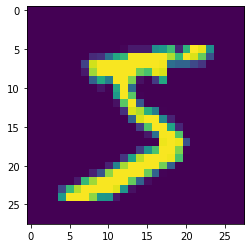

My Network Predicts That This Number Is... 5


In [ ]:
base_image = dataset[0][0].reshape(1, 784)
plt.imshow(base_image.reshape(28, 28).numpy())
plt.show()
net_prediction = torch.argmax(net(base_image.to(device))).item()
print("My Network Predicts That This Number Is... %s"%(net_prediction))

## 1.5 Adversarial Attack
Now for the fun part. Let's attack our network by creating an image that looks almost exactly like the one above, but makes it mistake the digit for a 3! How do we do that? 

Here's one way of doing it: instead of updating the **weights of our network**, what if we updated the **pixels of our image** using gradient descent? Take a moment to read that again. We're going to require gradients on our **image**, and then update it until the network is properly fooled!

Our problem is complex though. We have two goals: 


1.   `criterion_1`: We want to fool the network into thinking that the image is a 3, not a 5. 
2.   `criterion_2`: We want to make sure the modified image `mod_image` looks as much like the original `base_image` as possible.

Our loss will be a weighted sum between the losses evaluated on these two criteria, i.e. `loss = weight_1 * loss_1 + weight_2 * loss_2`. For our code below, let `weight_1 = 0.001` and `weight_2 = 1`.

**Your turn. Define `criterion_1`, `criterion_2`, `loss_1`, `loss_2`, and `loss`. Run the code; if your attack is successful it will print "ATTACK SUCCESSFUL"**




In [ ]:
#create a copy of base_image which we can modify
mod_image = base_image.clone() 
#our target class is 3. We send this to the device
target = torch.LongTensor([3]).to(device)
optimizer = optim.SGD([mod_image.requires_grad_(True)], lr = 0.01)

#Choose a good criterion to compare our prediction with the target
criterion1 = nn.CrossEntropyLoss()

#Choose a good criterion which describes how "far off" our mod_image
#is from the base_image
criterion2 = nn.KLDivLoss() #TODO: choose criterion2


for i in range(10000):
  prediction = net(mod_image.to(device))

  #loss_1 is the result of evaluating criterion_1 on the prediction of the net
  #compared to the target class.
  loss_1 = criterion1(prediction,target) #TODO: define loss_1

  #loss_2 is the result of evaluating criterion_2 on the current image
  #(mod_image) compared to the original image (base_image).
  loss_2 = criterion2(mod_image,base_image) #TODO: define loss_2

  #the final loss is a weighted sum of the losses, where weight_1 = 0.001 and weight_2 = 1
  loss = 0.001*loss_1 + 1*loss_2 #TODO: define loss
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() #complete the training

  predicted_class = prediction.argmax(dim=1)

  if predicted_class == target:
    print("Predicted Class: %s, Loss: %s, ATTACK SUCCESSFUL!"%(predicted_class.item(), loss.item()))
    break
  else:
    if i%10 == 0: 
      print("Predicted Class: %s, Loss: %s"%(predicted_class.item(), loss.item()))

Predicted Class: 5, Loss: -0.14721304178237915
Predicted Class: 5, Loss: -0.1473853439092636
Predicted Class: 5, Loss: -0.1475410908460617
Predicted Class: 5, Loss: -0.14768078923225403
Predicted Class: 5, Loss: -0.14780542254447937
Predicted Class: 5, Loss: -0.1479162722826004
Predicted Class: 5, Loss: -0.14801472425460815
Predicted Class: 3, Loss: -0.14808551967144012, ATTACK SUCCESSFUL!


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2748: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


So what does our image look like now? Run the cell below to compare the original input to the modified image, and how our network classifies each. Did we succeed?

**Take a screenshot of the output of this cell and save it for later.**

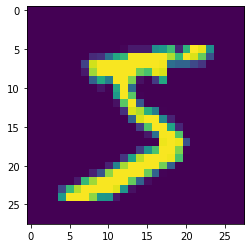

My Network Predicts That This Number Is... 5


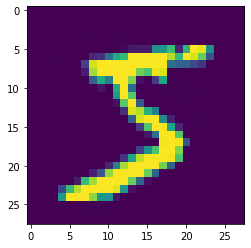

My Network Predicts That This Number Is... 3


In [ ]:
#@markdown Run this cell to display your adversarial attack!
net.eval()
plt.imshow(base_image.reshape(28, 28).detach().numpy())
plt.show()
net_prediction = torch.argmax(net(base_image.to(device))).item()
print("My Network Predicts That This Number Is... %s"%(net_prediction))
plt.imshow(mod_image.reshape(28, 28).detach().numpy())
plt.show()
net_prediction = torch.argmax(net(mod_image.to(device))).item()
print("My Network Predicts That This Number Is... %s"%(net_prediction))

# Part 2. Defend!
In this next part of the homework, we will ask you to use **regularization** to defend against the adversarial image you constructed in part 1. Try each of the following regularization techniques: 
* Early stopping
* Dropout (https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
* L2 regularization (hint: see the `weight_decay` parameter in optim.Adam: https://pytorch.org/docs/stable/optim.html)



## 2.1 Train your Defense
In this section, you'll train a network which will be able to detect that the adversarial image is a 5, not a 3.
**Make sure your network is exactly the same architecture as you had (with the exception of adding dropout layers)!**

**Your turn. Train your network on each regularization technique below. We recommend that you try each technique individually, and then combine them if necessary. Once your net completes training, you may test it on the adversarial image in the following section.**

In [ ]:
#Net2 should be the same architecture as Net1 with the exception of dropout layers
class Net2(nn.Module): 
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        return x

In [ ]:
#TODO: define net
torch.manual_seed(2021)
net = Net2().to(device)
#TODO: define optimizer
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay= 0.01) 
#TODO: choose a good criterion
criterion = nn.CrossEntropyLoss()

train(train_loader, net, optimizer, criterion)
loss, accuracy = test(val_loader, net, criterion)
print("Evaluation\n\tTest Loss: %.4f\tTest Accuracy: %.2f%%"%(loss, accuracy*100))

[Epoch 0]	Acc:0.1875	Loss:0.0358
[Epoch 0]	Acc:0.3433	Loss:0.0289
[Epoch 1]	Acc:0.3594	Loss:0.0269
[Epoch 1]	Acc:0.3587	Loss:0.0283
[Epoch 2]	Acc:0.3438	Loss:0.0319
[Epoch 2]	Acc:0.3700	Loss:0.0282
[Epoch 3]	Acc:0.3750	Loss:0.0283
[Epoch 3]	Acc:0.3735	Loss:0.0281
[Epoch 4]	Acc:0.4062	Loss:0.0271
[Epoch 4]	Acc:0.3666	Loss:0.0283
[Epoch 5]	Acc:0.3594	Loss:0.0300
[Epoch 5]	Acc:0.3661	Loss:0.0283
[Epoch 6]	Acc:0.3594	Loss:0.0273
[Epoch 6]	Acc:0.3744	Loss:0.0280
[Epoch 7]	Acc:0.4375	Loss:0.0251
[Epoch 7]	Acc:0.3687	Loss:0.0281
[Epoch 8]	Acc:0.4062	Loss:0.0255
[Epoch 8]	Acc:0.3721	Loss:0.0280
[Epoch 9]	Acc:0.4219	Loss:0.0258
[Epoch 9]	Acc:0.3764	Loss:0.0278
Evaluation
	Test Loss: 0.0283	Test Accuracy: 35.80%


## 2.2 How Did We Do?
Run the code below to test if your regularization worked. If successful, it will print "DEFENSE SUCCESSFUL". 

**Run the code below. Do not modify. If successful, take a screenshot and write down what regularization parameters led to your success**

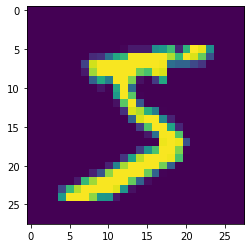

My Regularized Network Predicts That This Number Is... 5


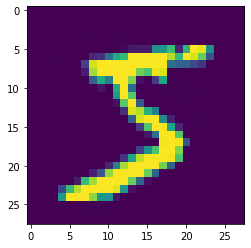

My Regularized Network Predicts That This Number Is... 5
DEFENSE SUCCESSFUL!


In [ ]:
#@markdown Run this cell to test your defense!
net.eval()

plt.imshow(base_image.reshape(28, 28).detach().numpy())
plt.show()
prediction_orig = net(mod_image.to(device))
net_predicted_class_orig = torch.argmax(prediction_orig).item()
print("My Regularized Network Predicts That This Number Is... %s"%(net_predicted_class_orig))
plt.imshow(mod_image.reshape(28, 28).detach().numpy())
plt.show()

prediction = net(mod_image.to(device))
net_predicted_class = torch.argmax(prediction).item()
print("My Regularized Network Predicts That This Number Is... %s"%(net_predicted_class))
if net_predicted_class_orig == 5 and net_predicted_class == 5: 
  print("DEFENSE SUCCESSFUL!")
  saved_prediction = prediction
else: 
  print("AW, SNAP! FOOLED AGAIN! GO BACK AND TRY A DIFFERENT REGULARIZATION COMBO")

**Write answers to the following questions below**
1. How did your regularized models compare to your original model, in terms of overall accuracy? How did they compare to one another?
2. Did your regularized models successfully defend against the adversarial task? If so, what parameters contributed to your success? 

In [ ]:
#Remove starter text and write your answer.
reflection_1 = '''The regularized model did not do well as compared to our original model in terms of overall accuracy.
For the regularized model, we got a test accuracy of 39.82%. For our original model, we got a test accuracy of 84.96%.
'''
refletion_2 = '''Yes, the regularized models successfully defend against the adversarial task'''
reflection_3 = '''The parameters that contributed to this success was using dropout with p=0.5 after each layer and also L2 regularization with weight_decay of 0.005'''

# Part 3. Deep Learning, Deeper Thinking


Now that you've gotten familiar with adversarial attacks and regularization, it's time to think about some of the implications of these attacks. First, read the following papers/articles.

* https://openai.com/blog/adversarial-example-research/
* https://www.sciencedirect.com/science/article/pii/S0743731518309183
(accessible through Penn Libraries)



## Part 3.1 Reflect
**Short answer: What type of adversarial attack did we conduct in section 1.5 (choose the most similar one based on the descriptions in the second paper)?**


In [ ]:
reflection_1 = 'The type of adversarial attack that we conducted in section 1.5 based on the descriptions in the second paper is: Fast gradient sign method (FGSM). This is because we add noise to our image (that has the label as 5) along the gradient directions to make it seem like it has label 3. Which is exactly similar to what is described for FGSM. ' #@param {type:"string"}

## Part 3.1 Discuss
**In 150-300 words, please answer the following questions, and also post these to Slack**
* As engineers, how can we safeguard against adversarial attacks? Give a real-world example of what an adversarial attack might look like (aside from the one you just deployed and the one we showed you in the worksheets), and what consequences it might have.
* How might adversarial attacks on machine learning algorithms impact public trust of these algorithms? How might we communicate these risks to the public? 



In [ ]:
reflection_2 = 'As engineers, we can safeguard against adversarial attacks by making use of the techniques as described in the HW, which is essentially by making use of regularization techniques such as early stopping, dropout and L2 regularization. A real world example of such an attack could be to fool smart home devices to gain un-authorized access to homes of other people or in the opposite case \u2013 deny access to authorized persons. A similar attack could also be used to fool facial recognition systems that are used to unlock phones these days and gain unauthorized access to them. Consequences of these attacks are very severe since they pose safety hazards, since unauthorized people would be able to get into our homes and our phones. Adversarial attacks on machine learning algorithms will have public lose faith in these systems and lose confidence in the reliability of these systems. Therefore, we should take all measures to prevent them as much as possible. These risks can be communicated to the public either by digital campaigns or disclaimers while they purchase these products that could potentially be attacked in this way. Giving ability to manually override these systems would also help mitigate the damage that could potentially be done and give confidence to the users.' #@param {type:"string"}

# Part 4. Rethinking Generalization


Read the first three pages of this article on "Understanding Deep Learning Requires Rethinking Generalization" [https://arxiv.org/pdf/1611.03530.pdf] and Answer the following questions:

1. Why is it important that neural nets can learn to get zero training error on 
images with randomized labels, or even on images that are pure random noise?

In [ ]:
reflection_3 = 'The article explains that the importance of the fact that neural nets can learn to get zero training error on images with randomized labels, or even on images that are pure random noise is that it shows:   1.\tNeural networks are capable enough to memorize the entire data set effectively. 2.\tEven Optimizing on random labels is easy and can be done in a proportion of time that is only slightly greater than the amount of time required to train the network on true labels. 3.\tIt shows that randomizing the target labels is simply just equivalent to a method of data transformation, leaving all other properties of the learning problem unchanged.  Also, it shows that by randomizing labels alone we can force the generalization error of a model to jump up considerably without changing the model, its size, hyperparameters, or the optimizer because successful deep artificial neural networks can exhibit a remarkably small difference between training and test performance. ' #@param {type:"string"}

2. How many weights are needed in a 2-layer ReLU to fit n observations each of dimension d?


In [ ]:
reflection_4 = 'p = (2n + d) parameters are required to fit n observations each of dimension d.' #@param {type:"string"}

3. Are standard regularization methods (e.g. L1, L2, early stopping) required to prevent overfitting?

In [ ]:
reflection_5 = 'The article explains that standard explicit regularization in neural networks does not necessarily improve generalization performance nor is sufficient by itself to control generalization error. This is directly in contrast with convex empirical risk minimization where explicit regularization is necessary to rule out trivial solutions. However, things work differently in deep learning where absence of all regularization explicitly does not necessarily imply poor generalization error.' #@param {type:"string"}

4. The authors argue that “implicit regularization” is more important than explicit regularization. What do they mean by “implicit regularization” and how does it work?

In [ ]:
reflection_6 = 'Neural networks have a kind of regularization that is imparted by virtue of their design\u2014such as using SGD for gradient descent. SGD acts as one of the implicit regularizers in the network. In linear models especially, using SGD always leads to a solution with smaller norm values. Hence, this proves that SGD acts as implicit regularization. This is primarily because of the noise that is added as a consequence of using SGD, since gradients are updated for each data point individually. This leads to more noise and therefore imparts exploratory tendencies in the search which is a form of regularization.' #@param {type:"string"}

# Part 5. Better-Know-A-Pod


**List 2 other members of your pod - not the same two that you listed in the last homeworks. What are they most excited about doing after the pandemic is over, and why? (around 100 words each).**





In [ ]:
better_know_your_pod = 'Kashyap from my pod said he would like to go to family get togethering and enjoy spending time with family all together . Due to pandemic different people in his family were struck at different places . So once the pandemic is over he would like to invite them all to a small function and talk for hours without wearing any mask. He is also exited to travel to the places in his bucket list like Canada , Europe and Middle East. I feel a lot of us share similar preferences as Kashyap. The pandemic has indeed forced families to be distant from each other over the past couple of years or so.  Joseph from my pod said he\u2019s mostly looking forward to traveling. When the pandemic started he had just gotten back from a semester abroad in New Zealand, and  had made plans to spend time in Vietnam and Cambodia with friends during the summer of 2020. He still plans on taking a long trip once the pandemic is over, but is not sure where he\u2019ll go. Could be SE Asia, South Africa, Argentina, or Kenya/Tanzania. As the social chair of the Graduate Association of Bioengineers, he\u2019s also looking forward to being able to have in-person happy hours again.' #@param {type:"string"}

# Submission
**Load the airtable below and submit your work.**

In [ ]:
#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**
#@markdown If you're having issues with the Airtable submission, use this link: https://airtable.com/shrByNErdzJvcmsvi.

import time
import numpy as np
import urllib.parse
from IPython.display import IFrame
def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefill_fields = {}
  for key in fields:
      new_key = 'prefill_' + key
      prefill_fields[new_key] = fields[key]
  prefills = urllib.parse.urlencode(prefill_fields)
  src = src + prefills
  return src

#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: my_email;
except NameError: my_email = ""


#autofill time if it is not present
try: t0;
except NameError: t0 = time.time()
try: t1;
except NameError: t1 = time.time()
times = np.array([t1])-t0

fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "email": my_email,
          "reflection_1":reflection_1,
          "reflection_2":reflection_2,
          "reflection_3":reflection_3,
          "reflection_4":reflection_4,
          "reflection_5":reflection_5,
          "reflection_6":reflection_6,
          "better_know_your_pod":better_know_your_pod,
          "cumulative_times": times}

src = "https://airtable.com/embed/shrByNErdzJvcmsvi?"

#now instead of the original source url, we do: src = prefill_form(src, fields)
display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))